In [1]:
import mlflow

mlflow.__version__

'2.21.3'

In [2]:
from src.utils.folder_operations import get_project_root

# set mlflow tracking uri
mlflow.set_tracking_uri(
    # (get_project_root() / 'mlflow_new/mlruns').as_uri()
    "http://localhost:3000"
)

# log_metric

In [3]:
# starting a run.

with mlflow.start_run(run_name="logging_metrics") as run:
    mlflow.log_metric("m1", 2.0)

# getting the run id and data
run = mlflow.get_run(run.info.run_id)
print("run_id:", run.info.run_id)
run.data.to_dictionary()

🏃 View run logging_metrics at: http://localhost:3000/#/experiments/0/runs/eb44906f104045e7824399e6e084883a
🧪 View experiment at: http://localhost:3000/#/experiments/0
run_id: eb44906f104045e7824399e6e084883a


{'metrics': {'m1': 2.0},
 'params': {},
 'tags': {'mlflow.user': 'caiosainvallio',
  'mlflow.source.name': '/Users/caiosainvallio/projects/mlflow_new/.venv/lib/python3.13/site-packages/ipykernel_launcher.py',
  'mlflow.source.type': 'LOCAL',
  'mlflow.runName': 'logging_metrics'}}

# log_metrics

In [4]:
#starting a run

metrics = {
    "m1": 2.0,
    "m2": 3.0,
    "m3": 4.0
}
with mlflow.start_run(run_name="logging_metrics") as run:
    mlflow.log_metrics(metrics)

# getting the run id and data
run = mlflow.get_run(run.info.run_id)
print("run_id:", run.info.run_id)
run.data.to_dictionary()

🏃 View run logging_metrics at: http://localhost:3000/#/experiments/0/runs/97d5b5bbc01a484abec1664638d8f868
🧪 View experiment at: http://localhost:3000/#/experiments/0
run_id: 97d5b5bbc01a484abec1664638d8f868


{'metrics': {'m1': 2.0, 'm2': 3.0, 'm3': 4.0},
 'params': {},
 'tags': {'mlflow.user': 'caiosainvallio',
  'mlflow.source.name': '/Users/caiosainvallio/projects/mlflow_new/.venv/lib/python3.13/site-packages/ipykernel_launcher.py',
  'mlflow.source.type': 'LOCAL',
  'mlflow.runName': 'logging_metrics'}}

# Log metric providing a run id

In [5]:
client = mlflow.MlflowClient()

#create a run
run = client.create_run(experiment_id="0",run_name="logging_metrics")
run_id = run.info.run_id

# log a metric
mlflow.log_metric(key="m1", value=1.0, run_id=run_id)

# log multiple metrics
metrics = {
    "m2": 2.0,
    "m3": 3.0
}
mlflow.log_metrics(metrics, run_id=run_id)


# end the run
client.set_terminated(run_id, status="FINISHED")

🏃 View run logging_metrics at: http://localhost:3000/#/experiments/0/runs/0659c619d50447b3b460fa4866314e14
🧪 View experiment at: http://localhost:3000/#/experiments/0


In [6]:
# check the run data
run = mlflow.get_run(run_id)

print("run_id: {}".format(run.info.run_id))
print("status: {}".format(run.info.status))
run.data.to_dictionary()

run_id: 0659c619d50447b3b460fa4866314e14
status: FINISHED


{'metrics': {'m1': 1.0, 'm2': 2.0, 'm3': 3.0},
 'params': {},
 'tags': {'mlflow.runName': 'logging_metrics'}}

# log_param

In [7]:
# starting a run.
with mlflow.start_run(run_name="logging_parameters") as run:
    mlflow.log_param("p1", 1)

# getting the run id and data
run = mlflow.get_run(run.info.run_id)
print("run_id:", run.info.run_id)
run.data.to_dictionary()

🏃 View run logging_parameters at: http://localhost:3000/#/experiments/0/runs/f0ad74e544d744818fea6baf63709af9
🧪 View experiment at: http://localhost:3000/#/experiments/0
run_id: f0ad74e544d744818fea6baf63709af9


{'metrics': {},
 'params': {'p1': '1'},
 'tags': {'mlflow.user': 'caiosainvallio',
  'mlflow.source.name': '/Users/caiosainvallio/projects/mlflow_new/.venv/lib/python3.13/site-packages/ipykernel_launcher.py',
  'mlflow.source.type': 'LOCAL',
  'mlflow.runName': 'logging_parameters'}}

# log_params

In [8]:
parameters = {
    "p1": 1,
    "p2": 2,
    "p3": 3
}
with mlflow.start_run(run_name="logging_parameters") as run:
    mlflow.log_params(parameters)
    
# getting the run id and data
run = mlflow.get_run(run.info.run_id)
print("run_id:", run.info.run_id)
run.data.to_dictionary()

🏃 View run logging_parameters at: http://localhost:3000/#/experiments/0/runs/0b1a46cad28c4bbe844dab33a399771d
🧪 View experiment at: http://localhost:3000/#/experiments/0
run_id: 0b1a46cad28c4bbe844dab33a399771d


{'metrics': {},
 'params': {'p1': '1', 'p2': '2', 'p3': '3'},
 'tags': {'mlflow.user': 'caiosainvallio',
  'mlflow.source.name': '/Users/caiosainvallio/projects/mlflow_new/.venv/lib/python3.13/site-packages/ipykernel_launcher.py',
  'mlflow.source.type': 'LOCAL',
  'mlflow.runName': 'logging_parameters'}}

# Log parameters providing run id

In [9]:
client = mlflow.MlflowClient()

#create a run
run = client.create_run(experiment_id="0", run_name="logging_parameters")
run_id = run.info.run_id

# log a parameter
# mlflow.log_param does not accept run_id as an argument
try:
    mlflow.log_param(key="p1", value="some value", run_id=run_id)
except Exception as e:
    print("ERROR:", e)

ERROR: log_param() got an unexpected keyword argument 'run_id'


In [10]:
# Unlike log_param, log_params accepts run_id as an argument
mlflow.log_params(parameters, run_id=run_id)

# Retrieve the run data
run = mlflow.get_run(run_id)
print("run_id:", run.info.run_id)
run.data.to_dictionary()

run_id: fa3d3a2551144e819d805601a2badd59


{'metrics': {},
 'params': {'p1': '1', 'p2': '2', 'p3': '3'},
 'tags': {'mlflow.runName': 'logging_parameters'}}

In [11]:
# end the run
client.set_terminated(run_id, status="FINISHED")

🏃 View run logging_parameters at: http://localhost:3000/#/experiments/0/runs/fa3d3a2551144e819d805601a2badd59
🧪 View experiment at: http://localhost:3000/#/experiments/0


In [12]:
run = client.create_run(experiment_id="0", run_name="logging_parameters")
run_id = run.info.run_id

# using client to log a parameter providing the run_id
client.log_param(run_id, "p1", "some value")

# log multiple parameters
parameters = {
    "p2": 2.0,
    "p3": "param 3"
}
mlflow.log_params(parameters, run_id=run_id)


# end the run
client.set_terminated(run_id, status="FINISHED")

🏃 View run logging_parameters at: http://localhost:3000/#/experiments/0/runs/18b208f9e1664183a4f9f6aa6cc97f00
🧪 View experiment at: http://localhost:3000/#/experiments/0


In [13]:
# getting the run id and data
run = mlflow.get_run(run.info.run_id)
print("run_id:", run.info.run_id)
run.data.to_dictionary()

run_id: 18b208f9e1664183a4f9f6aa6cc97f00


{'metrics': {},
 'params': {'p1': 'some value', 'p2': '2.0', 'p3': 'param 3'},
 'tags': {'mlflow.runName': 'logging_parameters'}}

# log_artifact

Log a single artifact

In [14]:
from pathlib import Path 

path = Path(get_project_root() / 'mlflow_new/artifacts_example/predictions.csv')

In [19]:
import os
os.environ['AWS_ACCESS_KEY_ID'] = 'mlflow'
os.environ['AWS_SECRET_ACCESS_KEY'] = 'mlflow123'
os.environ['MLFLOW_S3_ENDPOINT_URL'] = 'http://localhost:9000'

In [20]:
# starting a run.
with mlflow.start_run(run_name="logging_artifacts") as run:
    mlflow.log_artifact(path)

🏃 View run logging_artifacts at: http://localhost:3000/#/experiments/0/runs/e830443eea1942cda10fc22a9a68b077
🧪 View experiment at: http://localhost:3000/#/experiments/0


# log_artifacts

Log multiple artifacts

In [42]:
# starting a run
with mlflow.start_run(run_name="logging_artifacts") as run:
    mlflow.log_artifacts("artifacts_example")

In [43]:
# starting a run and providing artifact_path
with mlflow.start_run(run_name="logging_artifacts") as run:
    mlflow.log_artifacts("artifacts_example", artifact_path="my_artifacts")

# log_dict

In [44]:
# starting a run 
with mlflow.start_run(run_name="logging_artifacts") as run:
    dictionary = {
        "predictions.csv": "artifacts_example/predictions.csv",
        "model.pkl": "artifacts_example/model.pkl"
    }

    # Using json file
    mlflow.log_dict(dictionary= dictionary, artifact_file="my_files.json")

    # Using yaml file
    mlflow.log_dict(dictionary=dictionary, artifact_file="my_files.yaml")

# log_figure

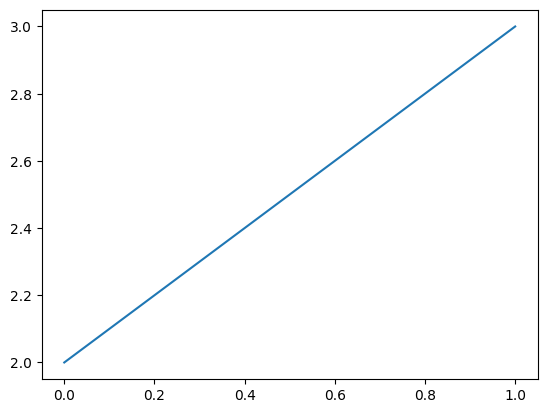

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([0, 1], [2, 3])


with mlflow.start_run(run_name="logging_figure") as run:
    # logging a figure
    mlflow.log_figure(fig, artifact_file="figures/figure.png")

# log_image

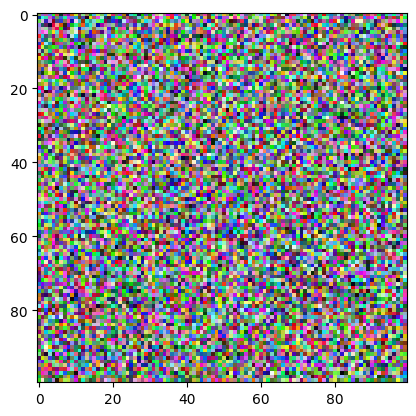

In [47]:
import numpy as np
from matplotlib import pyplot as plt

image = np.random.randint(0, 256, size=(100, 100, 3), dtype=np.uint8)

plt.imshow(image, interpolation='nearest')
plt.show()

with mlflow.start_run(run_name="logging_image") as run:
    # logging an image
    mlflow.log_image(image, artifact_file="images/image.png")